<b><h2>This is a data analysis using my personal Chase bank account's data of 2022</h2></b>

In [10]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
matplotlib.rcParams['figure.figsize'] = (14, 6)

In [11]:
# Read data in
df = pd.read_csv('Chase_2022_data.CSV')
df.head()

,Details,Posting Date,Description,Amount,Type,Balance,Check or Slip #
0,DEBIT,12/30/22,Zelle payment to poncao95 16167114625,-200.00,QUICKPAY_DEBIT,994.92,NaN
1,DEBIT,12/30/22,Zelle payment to Trinh Sg Flvs JPM999k957uy,-5.00,CHASE_TO_PARTNERFI,1194.92,NaN
2,DEBIT,12/30/22,Zelle payment to Trinh Sg Flvs JPM999k90sgs,-15.00,CHASE_TO_PARTNERFI,1199.92,NaN
3,DEBIT,12/30/22,DUKEENERGYCORPOR WEB_PAY PP...,-82.43,ACH_DEBIT,1214.92,NaN
4,CREDIT,12/30/22,Zelle payment from HANH NGOC DUC LE 16167184689,200.00,QUICKPAY_CREDIT,1297.35,NaN


In [12]:
# Sort data in ascending order to find Top Spending
df.sort_values(by='Amount').head()

,Details,Posting Date,Description,Amount,Type,Balance,Check or Slip #
270,DEBIT,8/11/22,Valencia Clg Nelnet 000000155506427 WE...,-1887.08,ACH_DEBIT,331.77,NaN
388,DEBIT,6/24/22,TIFFANY & CO 800-452-9146 NJ 0...,-1669.20,DEBIT_CARD,68.11,NaN
53,DEBIT,11/28/22,INSURANCE FOR STUDENT 800-356-1235 FL 1...,-1543.00,DEBIT_CARD,411.31,NaN
795,DEBIT,1/20/22,Valencia Clg Nelnet 000000141628699 WE...,-1125.00,ACH_DEBIT,459.11,NaN
170,DEBIT,9/20/22,Valencia Clg Nelnet 000000158716029 WE...,-1125.00,ACH_DEBIT,605.32,NaN


In [13]:
# Let's separate the Spendings data from Incomes
spendings = df[df['Amount'] < 0]
incomes = df[df['Amount'] > 0]

In [14]:
# This is my Top Spendings list
spendings.sort_values(by='Amount').head()

,Details,Posting Date,Description,Amount,Type,Balance,Check or Slip #
270,DEBIT,8/11/22,Valencia Clg Nelnet 000000155506427 WE...,-1887.08,ACH_DEBIT,331.77,NaN
388,DEBIT,6/24/22,TIFFANY & CO 800-452-9146 NJ 0...,-1669.20,DEBIT_CARD,68.11,NaN
53,DEBIT,11/28/22,INSURANCE FOR STUDENT 800-356-1235 FL 1...,-1543.00,DEBIT_CARD,411.31,NaN
712,DEBIT,2/22/22,Valencia Clg Nelnet 000000144029806 WE...,-1125.00,ACH_DEBIT,1472.25,NaN
238,DEBIT,8/22/22,Valencia Clg Nelnet 000000156348233 WE...,-1125.00,ACH_DEBIT,1674.26,NaN


In [15]:
# And this is my Top Incomes list
incomes.sort_values(by='Amount', ascending=False).head()

,Details,Posting Date,Description,Amount,Type,Balance,Check or Slip #
251,CREDIT,8/18/22,ATM CASH DEPOSIT 08/18 3 ALAFAYA WOODS BLVD OV...,2621.0,ATM,2693.35,NaN
113,CREDIT,10/17/22,ATM CASH DEPOSIT 10/15 3 ALAFAYA WOODS BLVD OV...,1290.0,ATM,1376.07,NaN
187,CREDIT,9/15/22,ATM CASH DEPOSIT 09/15 3 ALAFAYA WOODS BLVD OV...,1260.0,ATM,1285.61,NaN
534,CREDIT,4/26/22,VALENCIA REFUND REFUND PP...,1250.0,ACH_CREDIT,2380.71,NaN
501,CREDIT,5/9/22,ATM CASH DEPOSIT 05/09 3 ALAFAYA WOODS BLVD OV...,1210.0,ATM,1998.83,NaN


In [16]:
# Let's extract the Month from the Posting Date
df['Posting Date'] = pd.to_datetime(df['Posting Date'])
df['Posting Month'] = df['Posting Date'].dt.month
df['Posting Year'] = df['Posting Date'].dt.year
print(pd.unique(df['Posting Month']))

[12 11 10  9  8  7  6  5  4  3  2  1]


<AxesSubplot:xlabel='Posting Month', ylabel='Amount'>

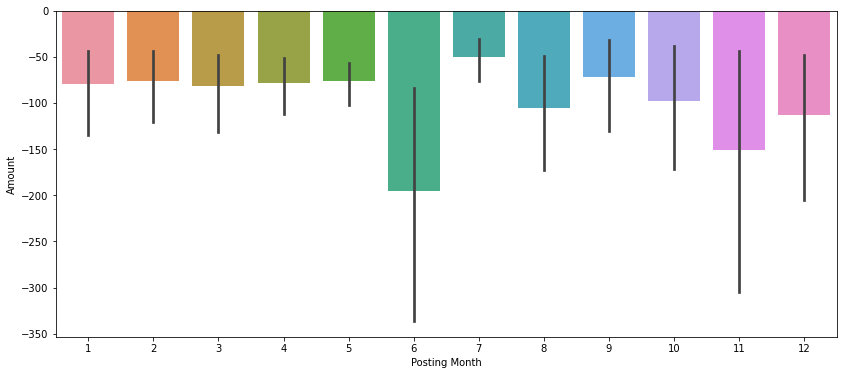

In [17]:
# Let's see my Monthly Spent
# plt.figure(figsize=(14,6))
sns.barplot(data=df[df['Amount'] < 0], x='Posting Month',y='Amount')

<i><b>*** Thought 1:</b> Wow! For some reason I spent a lot in <u>June</u> and maybe also <u>November</u>. I would love to find out: why?</i>

In [18]:
df[df['Posting Month'] == 6].sort_values('Amount').head()

,Details,Posting Date,Description,Amount,Type,Balance,Check or Slip #,Posting Month,Posting Year
388,DEBIT,2022-06-24,TIFFANY & CO 800-452-9146 NJ 0...,-1669.20,DEBIT_CARD,68.11,NaN,6,2022
405,DEBIT,2022-06-13,TIFFANY & CO 800-452-9146 NJ 0...,-1016.50,DEBIT_CARD,252.10,NaN,6,2022
379,DEBIT,2022-06-29,INSURANCE FOR STUDENT 800-356-1235 FL 0...,-949.00,DEBIT_CARD,521.45,NaN,6,2022
416,DEBIT,2022-06-09,Zelle payment to poncao95 14539626983,-740.00,QUICKPAY_DEBIT,1459.78,NaN,6,2022
391,DEBIT,2022-06-21,Valencia Clg Nelnet 000000152479696 WE...,-598.44,ACH_DEBIT,1820.31,NaN,6,2022


<i><b>*** Thought 2:</b> Oh! That was because I bought the engagement ring for my fiancée <u>TWICE</u> in June!</i>

In [19]:
df[df['Posting Month'] == 11].sort_values('Amount').head()

,Details,Posting Date,Description,Amount,Type,Balance,Check or Slip #,Posting Month,Posting Year
53,DEBIT,2022-11-28,INSURANCE FOR STUDENT 800-356-1235 FL 1...,-1543.0,DEBIT_CARD,411.31,NaN,11,2022
92,DEBIT,2022-11-01,Zelle payment to poncao95 15686943228,-957.0,QUICKPAY_DEBIT,251.62,NaN,11,2022
89,DEBIT,2022-11-02,PROG SELECT INS INS PREM PP...,-160.0,ACH_DEBIT,-59.70,NaN,11,2022
57,DEBIT,2022-11-25,Zelle payment to Trinh Sg Flvs JPM999ix5jwl,-100.0,CHASE_TO_PARTNERFI,1879.94,NaN,11,2022
76,DEBIT,2022-11-14,Zelle payment to Bon 15772325441,-90.0,QUICKPAY_DEBIT,432.92,NaN,11,2022


<i><b>*** Thought 3:</b> I also had to pay the insurance fees for both the Spring and Summer semesters in November, which usually only happens once a year.</i>

In [20]:
# Let's just drop the outliers because I don't think I'd ever buy an engagement ring again
df = df.drop(labels=([388, 405]))

In [21]:
df[df['Posting Month'] == 6].sort_values('Amount').head()

,Details,Posting Date,Description,Amount,Type,Balance,Check or Slip #,Posting Month,Posting Year
379,DEBIT,2022-06-29,INSURANCE FOR STUDENT 800-356-1235 FL 0...,-949.00,DEBIT_CARD,521.45,NaN,6,2022
416,DEBIT,2022-06-09,Zelle payment to poncao95 14539626983,-740.00,QUICKPAY_DEBIT,1459.78,NaN,6,2022
391,DEBIT,2022-06-21,Valencia Clg Nelnet 000000152479696 WE...,-598.44,ACH_DEBIT,1820.31,NaN,6,2022
378,DEBIT,2022-06-30,Zelle payment to poncao95 14696712592,-300.00,QUICKPAY_DEBIT,221.45,NaN,6,2022
404,DEBIT,2022-06-13,Zelle payment to Trinh Sg Flvs JPM999cvbe5v,-211.00,CHASE_TO_PARTNERFI,41.10,NaN,6,2022


In [22]:
# Let's see if there was any recurrent transaction
df['Amount'].value_counts().head(10)

-5.00       17
-20.00      14
-12.00      12
-10.00      12
-30.00      12
-79.99      10
-100.00      9
-39.00       7
-1125.00     7
-160.00      7
Name: Amount, dtype: int64

In [23]:
# Let's see what are the most repeated spendings
# Assume I did check all the values above by replacing the value after the '==' sign
df[df['Amount'] == -160]

,Details,Posting Date,Description,Amount,Type,Balance,Check or Slip #,Posting Month,Posting Year
39,DEBIT,2022-12-02,PROG SELECT INS INS PREM PP...,-160.0,ACH_DEBIT,60.38,NaN,12,2022
89,DEBIT,2022-11-02,PROG SELECT INS INS PREM PP...,-160.0,ACH_DEBIT,-59.70,NaN,11,2022
144,DEBIT,2022-10-03,PROG SELECT INS INS PREM PP...,-160.0,ACH_DEBIT,-175.14,NaN,10,2022
209,DEBIT,2022-09-02,PROG SELECT INS INS PREM PP...,-160.0,ACH_DEBIT,65.70,NaN,9,2022
590,DEBIT,2022-04-08,Zelle payment to Trinh Sg Flvs JPM999amdii3,-160.0,CHASE_TO_PARTNERFI,228.03,NaN,4,2022
670,DEBIT,2022-03-07,Zelle payment to poncao95 13815694057,-160.0,QUICKPAY_DEBIT,483.10,NaN,3,2022
671,DEBIT,2022-03-07,Zelle payment to poncao95 13813587929,-160.0,QUICKPAY_DEBIT,643.10,NaN,3,2022


<i><b>*** Thought 4:</b> The most recurrent expenses are all necessary so no tweaking can be done here.</i>

In [24]:
df[(df['Amount'] < 0) & (df['Amount'] > -8)].head(30)

,Details,Posting Date,Description,Amount,Type,Balance,Check or Slip #,Posting Month,Posting Year
1,DEBIT,2022-12-30,Zelle payment to Trinh Sg Flvs JPM999k957uy,-5.00,CHASE_TO_PARTNERFI,1194.92,NaN,12,2022
17,DEBIT,2022-12-20,Microsoft*Store 425-6816830 WA 1...,-1.00,DEBIT_CARD,1137.52,NaN,12,2022
23,DEBIT,2022-12-16,PARCEL PENDING 855-977-1676 CA 1...,-5.00,DEBIT_CARD,1044.83,NaN,12,2022
37,DEBIT,2022-12-02,Wal-Mart Super Center OVIEDO FL 1...,-7.62,DEBIT_CARD,42.76,NaN,12,2022
40,DEBIT,2022-12-02,Amazon web services aws.amazon.co WA 1...,-0.17,DEBIT_CARD,220.38,NaN,12,2022
73,DEBIT,2022-11-16,PARCEL PENDING 855-977-1676 CA 1...,-5.00,DEBIT_CARD,370.53,NaN,11,2022
111,DEBIT,2022-10-17,PARCEL PENDING 855-977-1676 CA 1...,-5.00,DEBIT_CARD,1481.07,NaN,10,2022
153,DEBIT,2022-09-26,COSTCO WHSE #0185 WINTER PARK FL 605061 0...,-2.12,DEBIT_CARD,435.69,NaN,9,2022
165,DEBIT,2022-09-22,MICROSOFT*STORE MSBILL.INFO WA 0...,-1.00,DEBIT_CARD,475.49,NaN,9,2022
177,DEBIT,2022-09-19,U-HAUL TOLLS AND CITA 800-789-3638 AZ 0...,-1.92,DEBIT_CARD,1856.43,NaN,9,2022


<i><b>*** Thought 5:</b> There are some payments that I can possibly cut such as spendings on Starbucks, Royal Tea and Microsoft Store's video games. The saved money can be rerouted to utilities bills or gas which are required for my living as an international student in the U.S.</i>

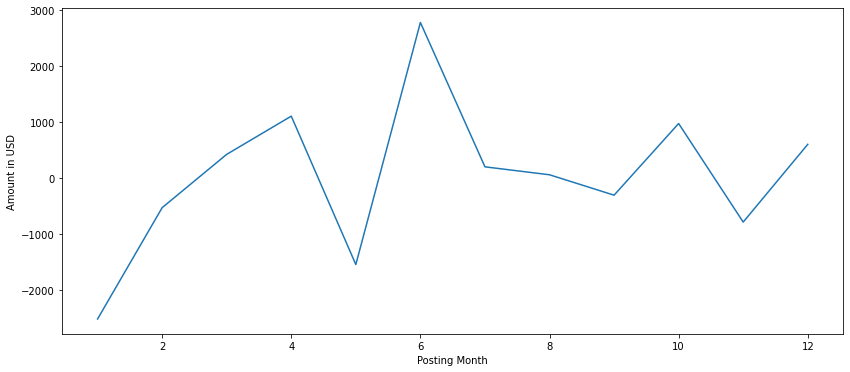

In [25]:
# This is the plot for my Net Spendings grouped by Month
plt.plot(df['Amount'].groupby(df['Posting Month']).sum())
plt.xlabel('Posting Month')
plt.ylabel('Amount in USD')
plt.show()

In [26]:
# Let's see my Total Deposits by Month
df['Amount'].loc[df['Amount'] > 0].groupby(df['Posting Month']).sum()

Posting Month
1     1539.54
2     3987.15
3     4850.98
4     5165.85
5     4437.63
6     6557.39
7     3260.06
8     6792.86
9     2998.35
10    4415.55
11    2834.51
12    4098.59
Name: Amount, dtype: float64

In [27]:
# ...and Total Expenses by Month
df['Amount'].loc[df['Amount'] < 0].groupby(df['Posting Month']).sum()

Posting Month
1    -4050.21
2    -4510.92
3    -4422.58
4    -4055.64
5    -5976.49
6    -3774.60
7    -3054.60
8    -6729.21
9    -3298.91
10   -3436.90
11   -3615.22
12   -3491.61
Name: Amount, dtype: float64

<i><b>*** Thought 6:</b> My monthly spendings are quite stable except when I had to spend more for tuition plans in May and health insurance in August.</i>

In [29]:
# Let's save the DataFrame to a Excel file for further usage
df.to_excel('Chase_2022_Data_w_MnY.xlsx')

<h2>Final Thought</h2>
<p><i>My bank spending activities are quite stable through the year of 2022, when I usually pay for only what necessary to me such as tuition fees and monthly utilities. The only spikes were my purchase for the engagement ring for my fiancee and the health insurance fee for the upcoming semesters in 2023. There were also some minor expenses such as coffees and teas that I can possibly cut to save money for utilities bills.</i></p>
<p><i>About my incomes, I currently have none because I am still an F-1 student and only deposit money from my family support for all expenses.</i></p>